In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler, Normalizer, StandardScaler
from sklearn.cluster import KMeans
from itertools import combinations

*We want to answer the question, does the player's stats back up his salary? or is* **something else?**

## GET THE PLAYERS STATS

In [3]:
regularSeason2019 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2020_per_poss.html')[0]
regularSeason2019 = regularSeason2019[regularSeason2019['Player']!='Player']
regularSeason2019 = regularSeason2019.sort_values( by = 'MP', ascending = False).drop_duplicates(subset = 'Player', keep = 'first')
regularSeason2019[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P',
         '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 
         'FTA', 'FT%', 'ORB','DRB', 'TRB', 'AST',
         'STL', 'BLK', 'TOV', 'PF', 'PTS']] = regularSeason2019.loc[:,['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA',
                                                          '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%','ORB',
                                                          'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(pd.to_numeric)
regularSeason2019 = regularSeason2019.loc[regularSeason2019['MP']>400]                                                          
regularSeason2019.reset_index( inplace = True)
regularSeason2019 = regularSeason2019.drop(['Unnamed: 29','ORtg', 'DRtg','Rk', 'index'], axis = 1)

regularSeason2020 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2021_per_poss.html')[0]
regularSeason2020 = regularSeason2020[regularSeason2020['Player']!='Player']
regularSeason2020 = regularSeason2020.sort_values( by = 'MP', ascending = False).drop_duplicates(subset = 'Player', keep = 'first')
regularSeason2020[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P',
         '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 
         'FTA', 'FT%', 'ORB','DRB', 'TRB', 'AST',
         'STL', 'BLK', 'TOV', 'PF', 'PTS']] = regularSeason2020.loc[:,['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA',
                                                          '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%','ORB',
                                                          'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(pd.to_numeric)
regularSeason2020 = regularSeason2020.loc[regularSeason2020['MP']>400]   
regularSeason2020.reset_index( inplace = True)    
regularSeason2020 = regularSeason2020.drop(['Unnamed: 29','ORtg', 'DRtg','Rk', 'index'], axis = 1)                                     

regularSeason2021 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2022_per_poss.html')[0]
regularSeason2021 = regularSeason2021[regularSeason2021['Player']!='Player']
regularSeason2021 = regularSeason2021.sort_values( by = 'MP', ascending = False).drop_duplicates(subset = 'Player', keep = 'first')
regularSeason2021[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P',
         '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 
         'FTA', 'FT%', 'ORB','DRB', 'TRB', 'AST',
         'STL', 'BLK', 'TOV', 'PF', 'PTS']] = regularSeason2021.loc[:,['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA',
                                                          '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%','ORB',
                                                          'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(pd.to_numeric)
regularSeason2021 = regularSeason2021.loc[regularSeason2021['MP']>400]
regularSeason2021.reset_index( inplace = True)
regularSeason2021 = regularSeason2021.drop(['Unnamed: 29','ORtg', 'DRtg','Rk', 'index'], axis = 1)

regularSeason2022 = pd.read_html('https://www.basketball-reference.com/leagues/NBA_2023_per_poss.html')[0]
regularSeason2022 = regularSeason2022[regularSeason2022['Player']!='Player']
regularSeason2022 = regularSeason2022.sort_values( by = 'MP', ascending = False).drop_duplicates(subset = 'Player', keep = 'first')
regularSeason2022[['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P',
         '3PA', '3P%', '2P', '2PA', '2P%', 'FT', 
         'FTA', 'FT%', 'ORB','DRB', 'TRB', 'AST',
         'STL', 'BLK', 'TOV', 'PF', 'PTS']] = regularSeason2022.loc[:,['G', 'GS', 'MP', 'FG', 'FGA', 'FG%','3P', '3PA',
                                                          '3P%', '2P', '2PA', '2P%', 'FT', 'FTA', 'FT%','ORB',
                                                          'DRB', 'TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS']].apply(pd.to_numeric)
regularSeason2022 = regularSeason2022.loc[regularSeason2022['MP']>400]    
regularSeason2022.reset_index( inplace = True)       
regularSeason2022 = regularSeason2022.drop(['Unnamed: 29','ORtg', 'DRtg','Rk', 'index'], axis = 1)                                         

## GET PLAYERS'S SALARIES

In [4]:
def getPlayersSalaries(year : int):
    dfList = []
    pS = []
    for i in range(16): ## 20 IS A GOOD NUMBER, CAUSE EVERY PAGE HAS MORE OR LESS 50 PLAYERS AND THERE ARENT MORE THAN 500 PLAYERS PER SEASON
        try:
            pS.append(pd.read_html(f'https://www.espn.com/nba/salaries/_/year/{str(year)}/page/{str(i)}/seasontype/4'))
        except:
            break ## IF THERE AIN'T MORE PAGES TO SCRAPE THE LOOP STOPS!
    for q in pS:
        dfList.append(q[0])
    cleanDf = pd.concat(dfList) ## appends all the df in a Df
    cleanDf.columns = cleanDf.iloc[0,:]  ## get the names of the columns
    cleanDf = cleanDf.iloc[1:,:] ## the df starts from the position 1 to get rid of the first row
    cleanDf = cleanDf[cleanDf['NAME']!='NAME'] ## get rid of rows that repeat the headers
    cleanDf.drop('RK', axis =1, inplace = True)
    cleanDf = cleanDf.reset_index().drop('index', axis = 1)
    cleanDf['SALARY'] = cleanDf['SALARY'].str.replace('$','').str.replace(',','').astype(int)
    cleanDf['NAME'] = cleanDf['NAME'].str.split(',', expand = True)[0] ## to get rid of the players position, e.g. PG, C, SG, SF
    cleanDf.drop_duplicates(subset='NAME', inplace = True)
    cleanDf['YEAR'] = str(year)
    return cleanDf.copy()

In [5]:
salaries_2019 = getPlayersSalaries(2019)
salaries_2020 = getPlayersSalaries(2020)
salaries_2021 = getPlayersSalaries(2021)
salaries_2022 = getPlayersSalaries(2022)
salaries_2023 = getPlayersSalaries(2023)

def checkLenofDfs():
    '''
    Function that checks if all the data was successfully loaded
    '''
    for i in [len(salaries_2019), len(salaries_2020), len(salaries_2021), len(salaries_2022), len(salaries_2023)]:
        if i < 400:
            raise ValueError("At least one of the DF wasnt successfully loaded'")
        else:
            return None

checkLenofDfs()

## DATA PREPROCESSING 

*Start with a single season e.g. 2021*

In [6]:
regseason2021 = regularSeason2021.merge(salaries_2021[['NAME','SALARY']], left_on = 'Player', right_on = 'NAME')

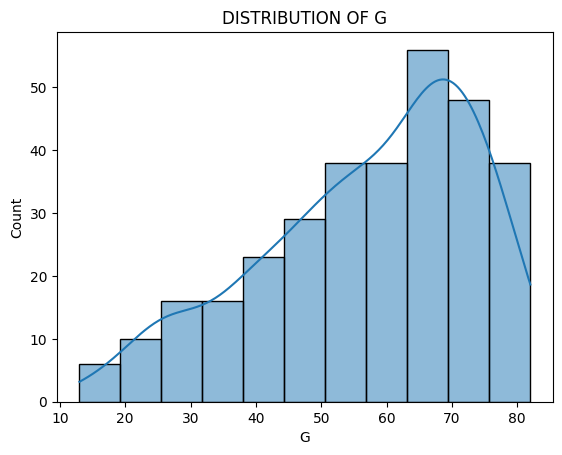

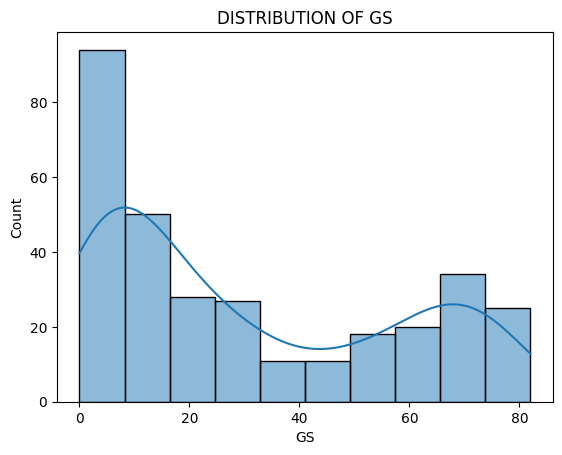

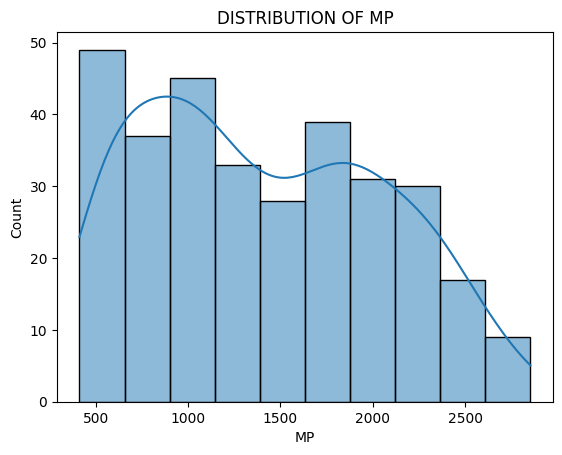

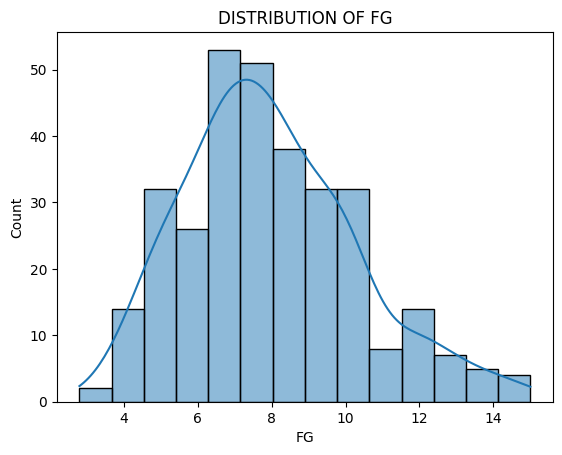

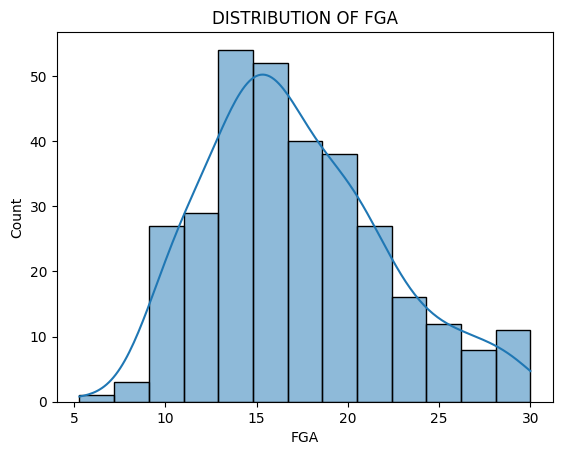

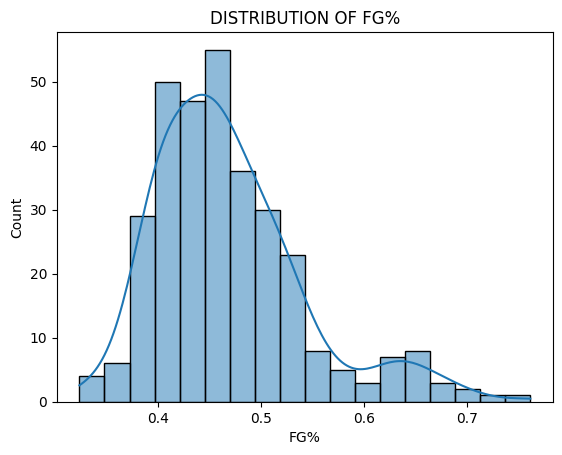

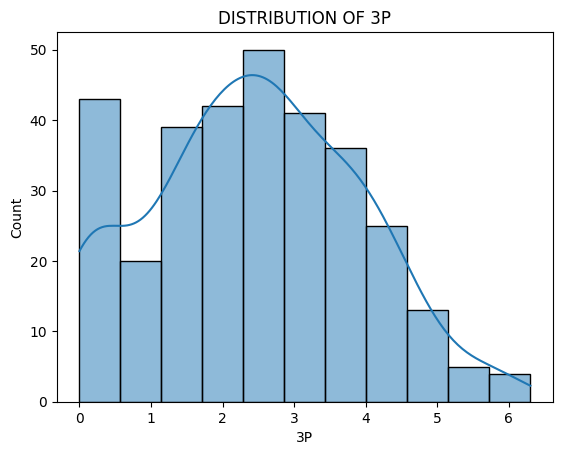

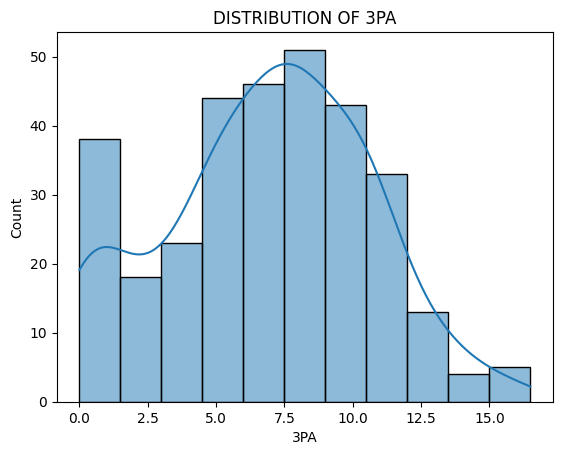

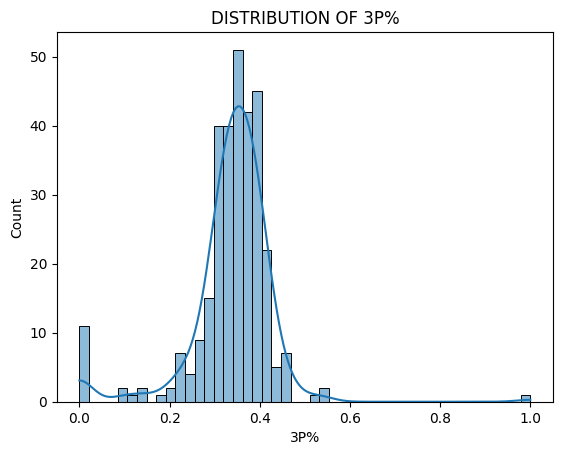

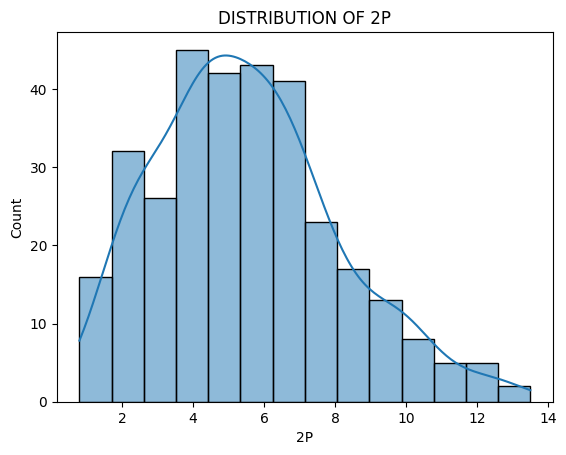

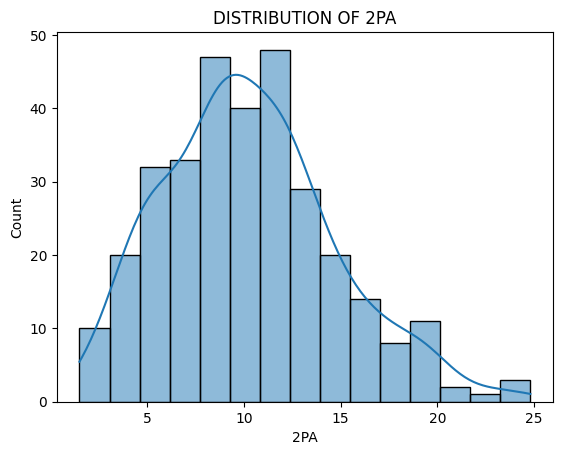

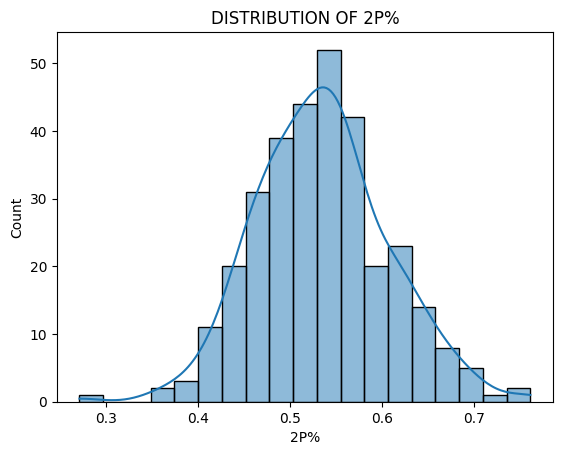

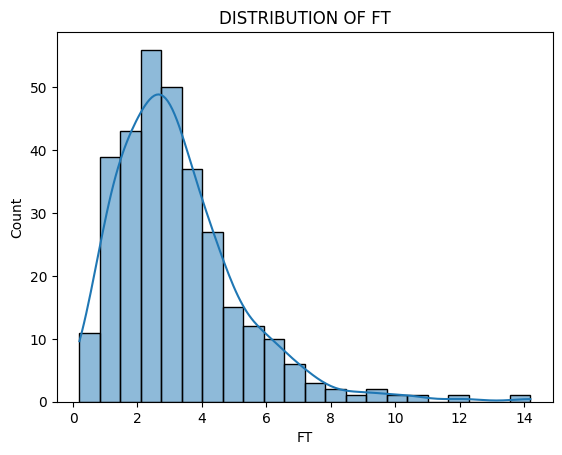

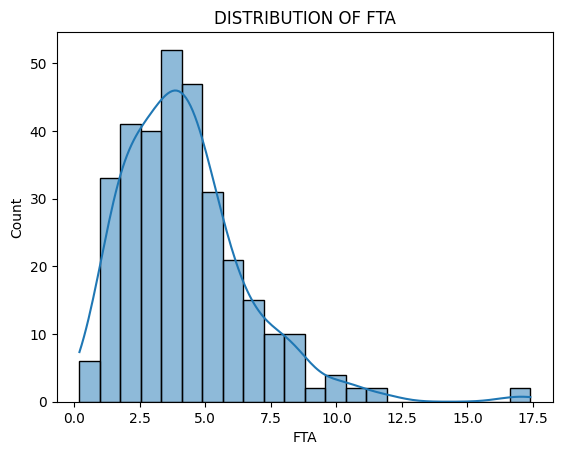

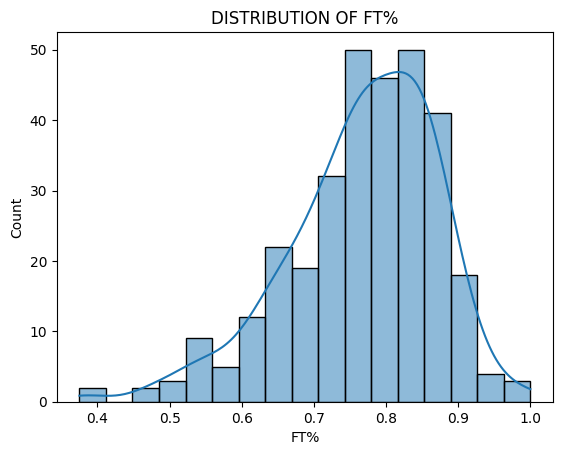

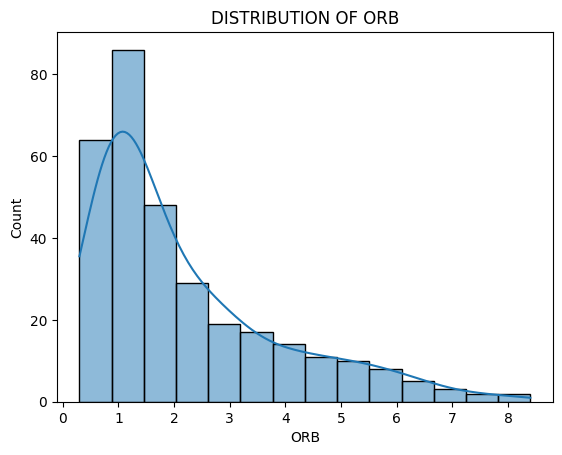

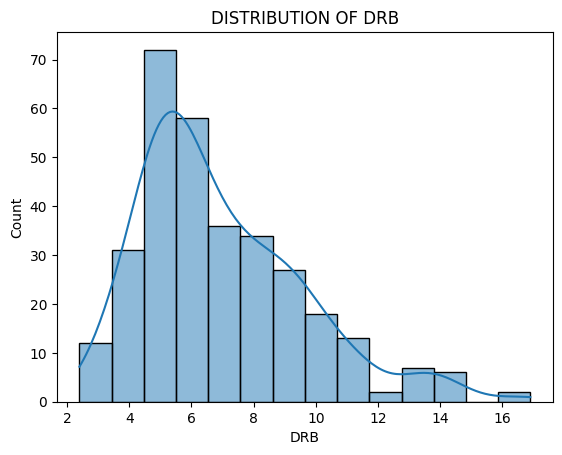

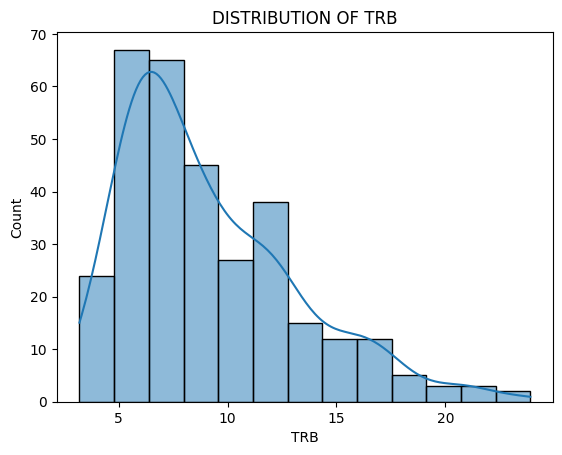

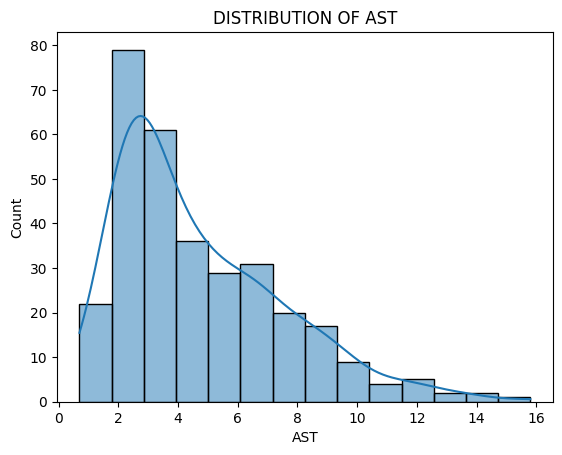

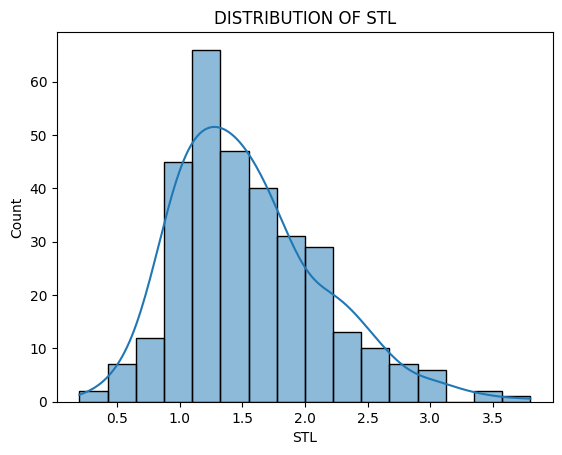

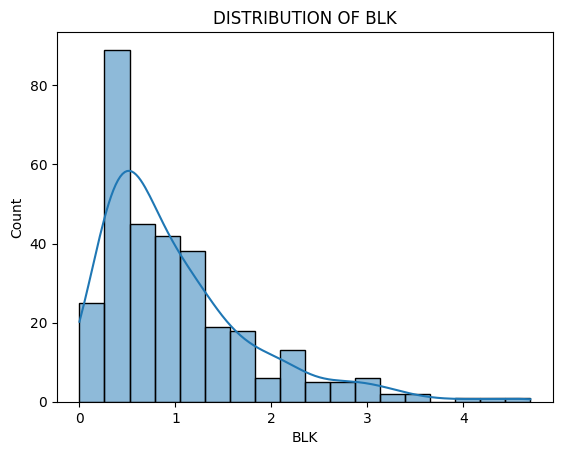

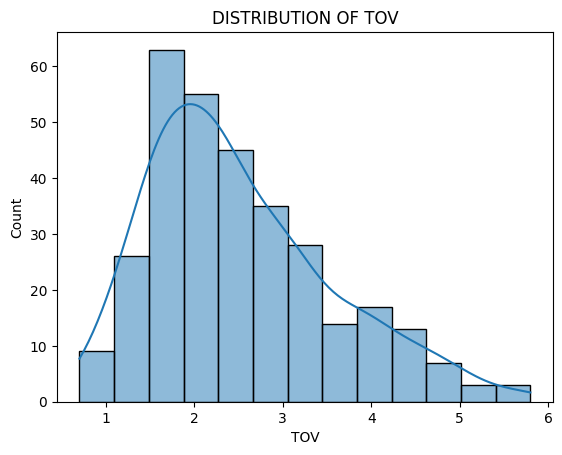

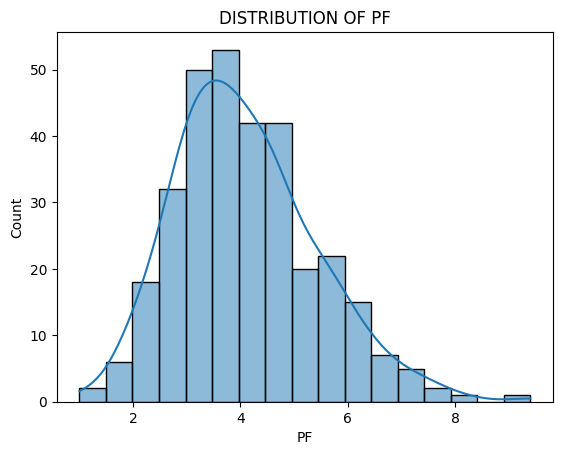

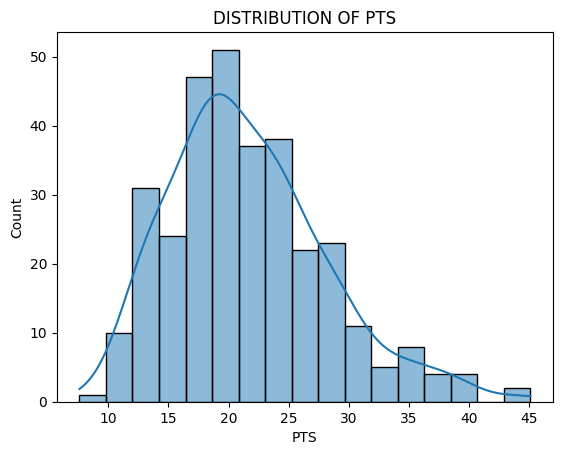

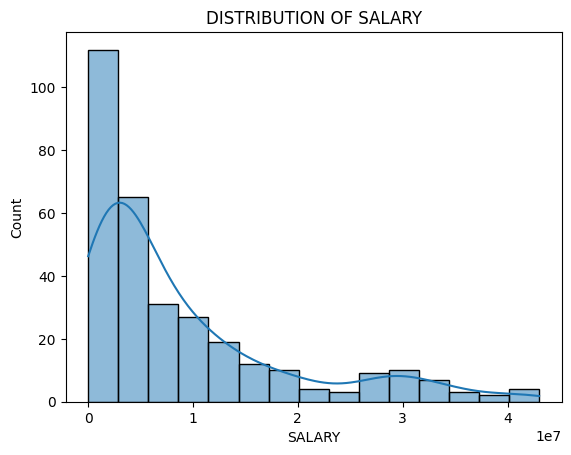

In [13]:
for i in regseason2021.select_dtypes(include='number').columns:
    sns.histplot(regseason2021, x = i, kde = True)
    plt.title(f'DISTRIBUTION OF {i.upper()}')
    plt.show()

In [14]:
xKmean = regseason2021[['G', 'GS', 'MP',  '3P%','2P%', 'FT%','TRB', 'AST', 'STL', 'BLK',
               'TOV', 'PTS', 'SALARY']].copy()
xKmean.dropna(inplace = True)

In [15]:
scaler = MinMaxScaler()
xKmean[['G', 'GS', 'MP',  '3P%','2P%', 'FT%','TRB', 'AST', 'STL', 'BLK',
               'TOV', 'PTS', 'SALARY']] = scaler.fit_transform(xKmean)

## CLUSTERING AND VISUALIZATION

In [ ]:
inertia = []
for k in range(1, 15):
    kmeanloop = KMeans(n_clusters = k)
    kmeanloop.fit(xKmean.iloc[:, :-1])
    inertia.append(kmeanloop.inertia_)

plt.plot(range(1,15), inertia, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Score')
plt.title('Elbow Curve')
plt.show()

### 2 AND 3 CLUSTERS ARE THE BEST CANDIDATES FOR N_CLUSTERS

In [ ]:
kmean = KMeans(n_clusters = 3)
kmean.fit(xKmean.iloc[:, :-1])
xKmean['CLUSTER'] = kmean.labels_

In [ ]:

for i in list(combinations(xKmean.iloc[:, :-2].columns,2)):
    var1, var2 = f'{i[0]}',f'{i[1]}'
    i0, i1 = xKmean.iloc[:, :-2].columns.get_indexer(xKmean.iloc[:, :-2][[var1,var2 ]].columns.values)
    sns.scatterplot(xKmean.iloc[:, :-2], x = var1, y = var2, hue = kmean.labels_, palette='Spectral', legend = False )
    sns.scatterplot(x= kmean.cluster_centers_[:,i0],y = kmean.cluster_centers_[:,i1], hue = range(kmean.n_clusters),palette = 'Spectral', s = 600, alpha = 0.8)
    plt.title('Clústers')
    plt.legend(loc = 'best')
    plt.show()
    print('\n')


### 3 VARIABLES SEEMS TO BE THE MAIN FEATURES FOR SPLIT THE PLAYERS IN THE CLUSTERS
### - MP  -> MINUTES PLAYED
### - G -> GAMES PLAYED
### - GS -> GAMES STARTED

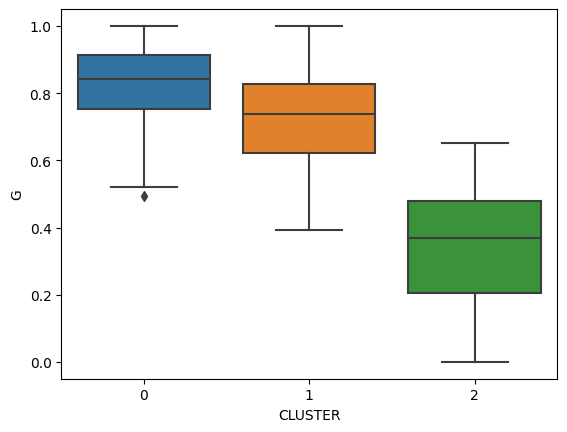

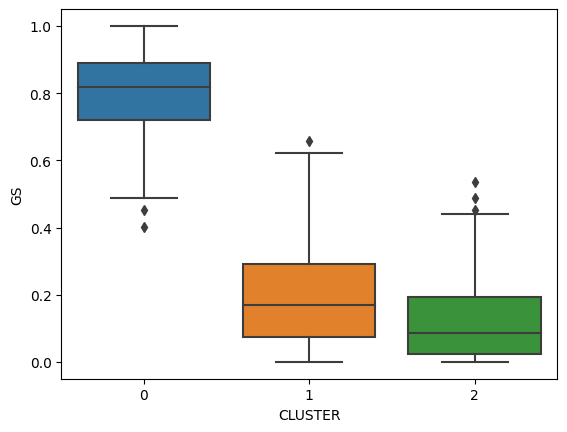

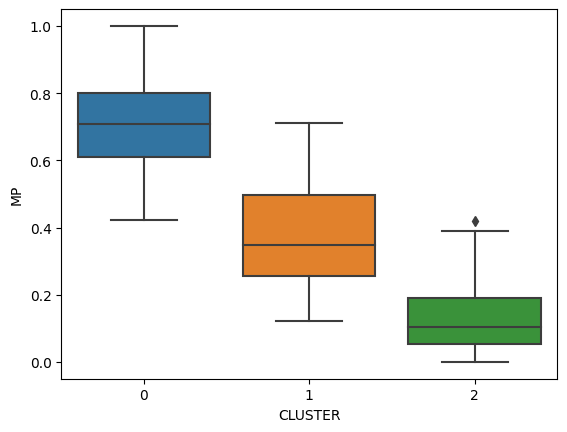

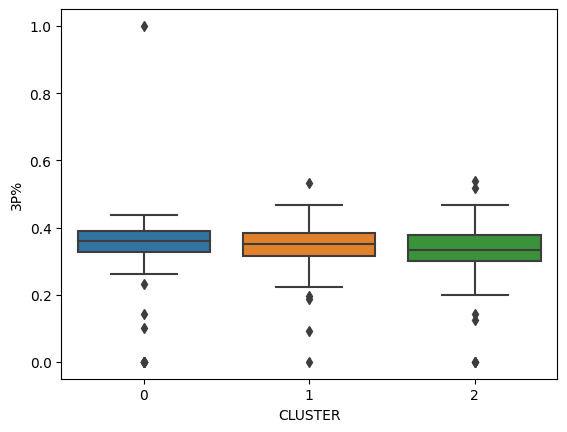

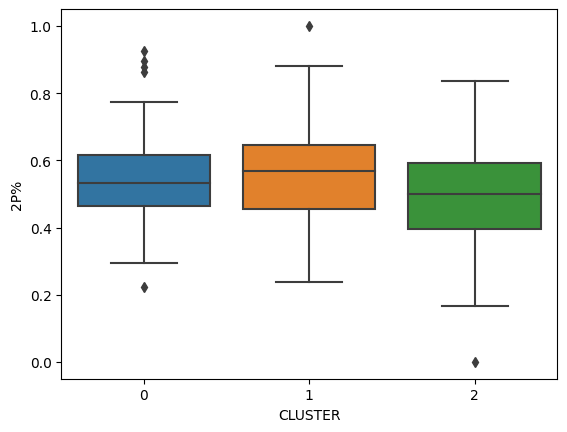

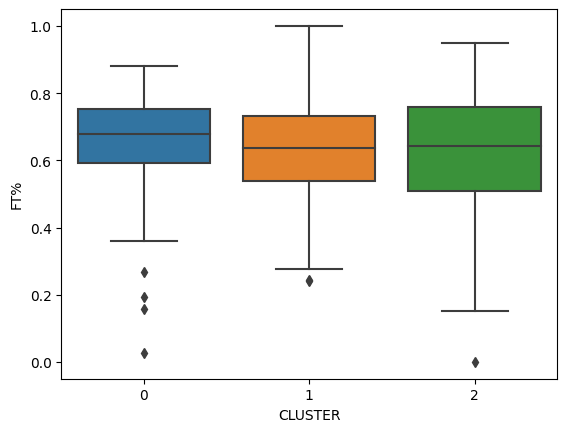

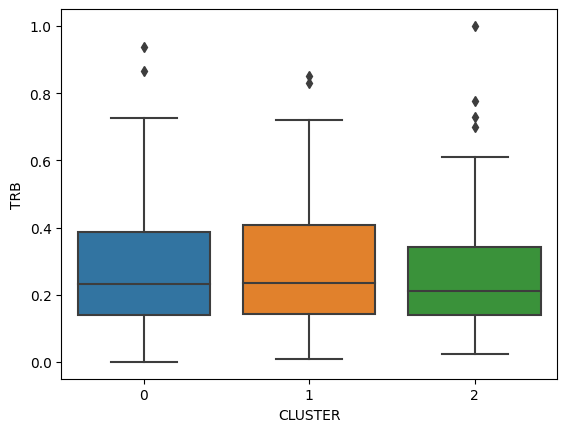

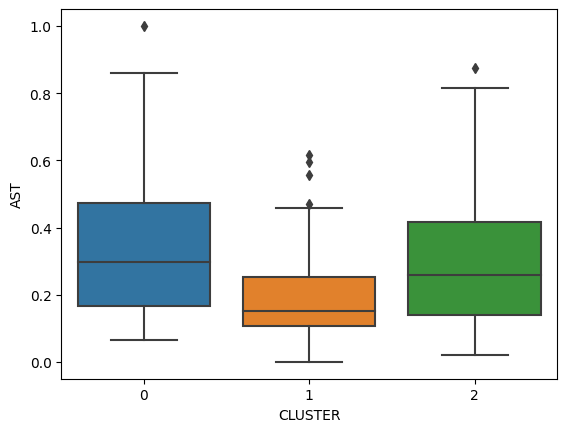

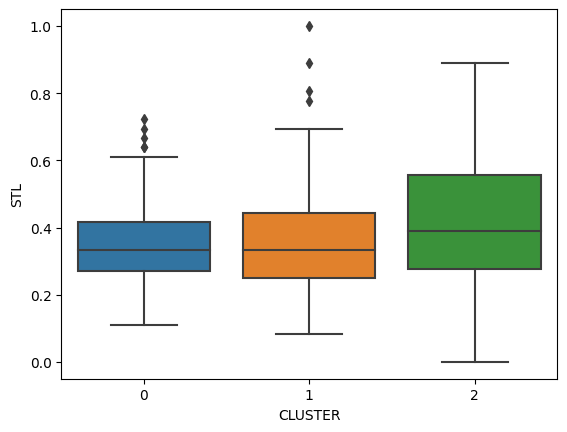

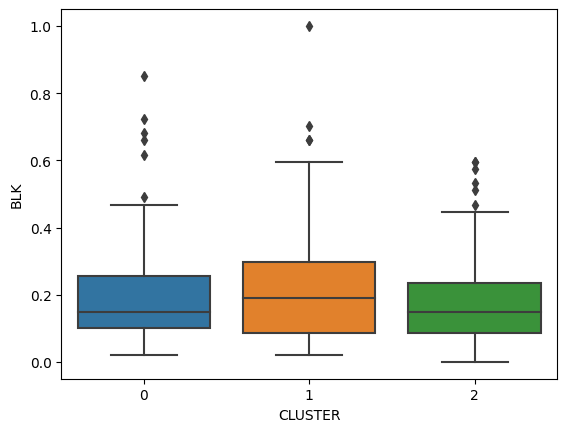

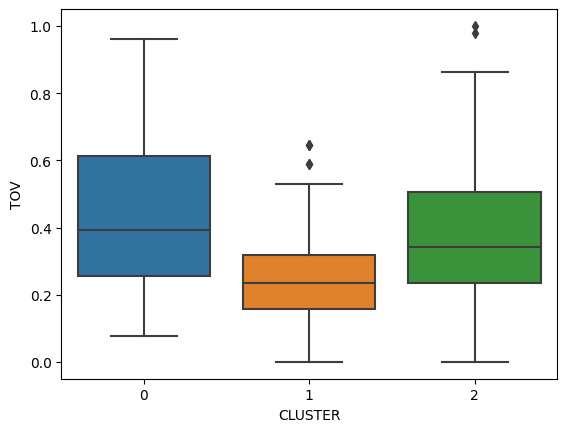

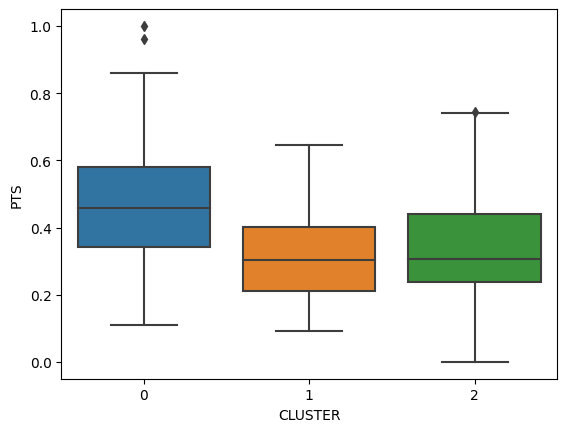

In [20]:
for c in xKmean.iloc[:, :-2].columns:
    sns.boxplot(xKmean, y = c, x = 'CLUSTER')
    plt.show()